<a href="https://colab.research.google.com/github/ehgeraldo/Python_Do_Zero_Ao_Ds/blob/main/meigarom_aula__03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**House Rocket Company:**

A House Rocket é uma plataforma digital que têm como modelo de negócio, a compra e a venda de imóveis utilizando dados online como critério de aquisição. O objetivo é encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

A principal estratégia é adquirir imóveis em ótimas localizações com preços baixos e atrativos para revender à preços mais altos; lucrando mais, maximizando a sua receita.

https://www.kaggle.com/harlfoxem/housesalesprediction




In [ ]:
#Os principais fatores que influenciam na decisão de compra de um imóvel:

# Localização
# Preço e condição de pagamento
# Metragem
# Acabamento
# Vagas de garagem
# Opções de lazer

**Aula#3:**

**Solicitações do CEO:**

1. Criar a coluna Dormitory Types:

Imóveis sem quarto: NaDT (Not a Dormitory Type);
Imóveis com 1 quarto: Studio;
Imóveis com 2 quartos: Apartment;
Imóveis com números de quarto acima de 2 e menores ou iguais a 4: House;
Imóveis com mais de 4 quartos: Mansion.?

2. Qual o menor número de quartos por ano de construção de imóveis?
3. Qual o preço de compra mais alto por cada número de quartos?
4. Qual a soma de todos os preços de compra por número de quartos?
5. Qual a soma de todos os preços de compra por número de quartos e banheiros?
6.  Qual o tamanho médio de salas dos imóveis por ano de construção?
7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
8. Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?
9. Como é o crescimento total de preços de compras dos imoveis por ano, por dia e pela semana do ano?
10. Faça um mapa que identifique as casas com maior preço






In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
upload = files.upload()

Saving dataset-original.jpg to dataset-original.jpg


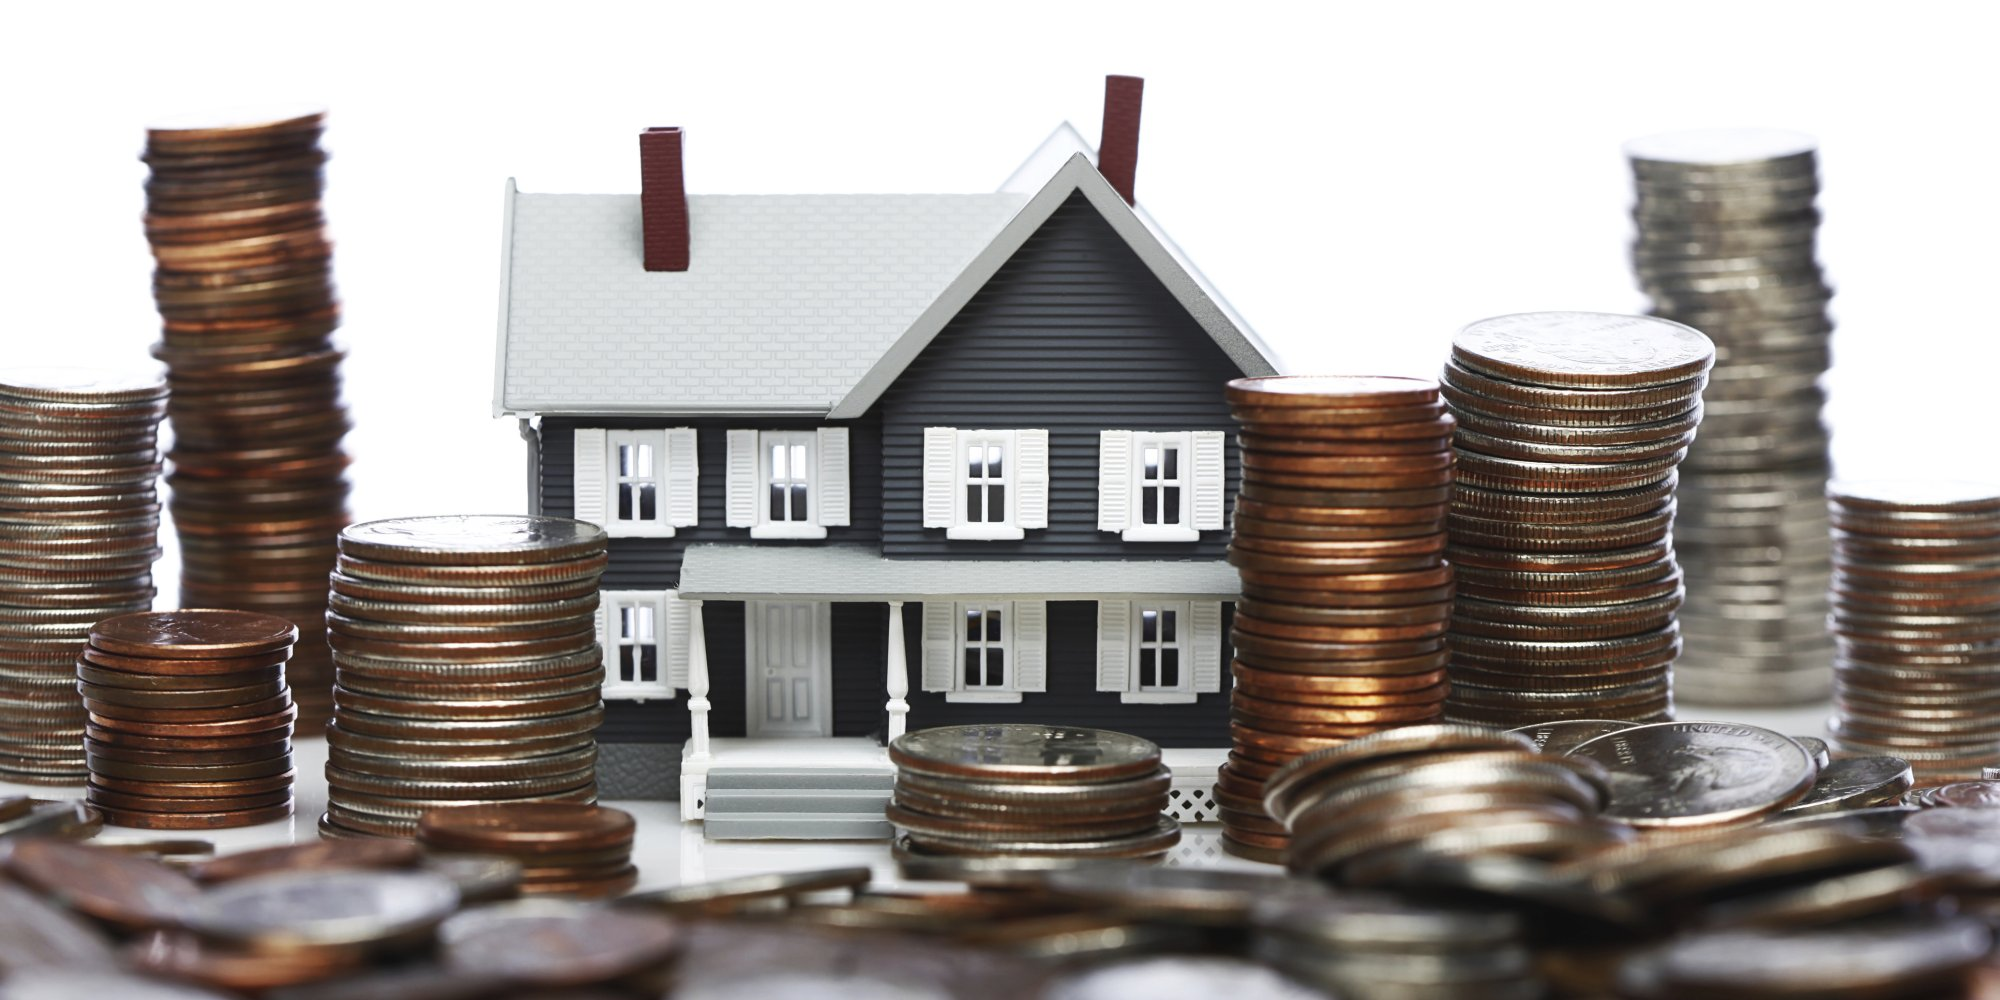

In [ ]:
Image('dataset-original.jpg', width = 1300)

#Imports:

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Loading data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv( '/content/drive/MyDrive/kc_house_data.csv')

In [ ]:
# Verificação do topo do arquivo:

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180.000,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170.000,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770.000,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050.000,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680.000,0,1987,0,98074,47.617,-122.045,1800,7503


In [ ]:
# Verificação da base do arquivo:

df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530.000,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310.000,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020.000,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600.000,0,2004,0,98027,47.535,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.000,2,0.750,1020,1076,2.000,0,0,3,7,1020.000,0,2008,0,98144,47.594,-122.299,1020,1357


In [ ]:
# Verificação do tipo de variáveis temos nas colunas:
# (object, int64, float64)

df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Verificação se NAN 
 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# 1: Criar a coluna Dormitory Types

# Imóveis sem quarto: NaDT (Not a Dormitory Type);
# Imóveis com 1 quarto: Studio;
# Imóveis com 2 quartos: Apartment;
# Imóveis com números de quarto acima de 2 e menores ou iguais a 4: House;
# Imóveis com mais de 4 quartos: Mansion.




df['dormitory_type'] = None
df.head()


df.loc[(df['bedrooms'] == 1), 'dormitory_type' ] = 'studio' 

df.loc[(df['bedrooms'] == 2), 'dormitory_type' ] = 'apartment'

df.loc[( df['bedrooms'] > 2 ) & ( df['bedrooms'] >= 4 ), 'dormitory_type'] = 'house'

df.loc[(df['bedrooms'] > 4 ), 'dormitory_type'] ='mansion'

In [ ]:
# Verificação da coluna 'dormitory_type' e itens para esta classificação.

df.dormitory_type.value_counts()

house        6882
apartment    2760
mansion      1935
studio        199
Name: dormitory_type, dtype: int64

In [ ]:
# 2. Qual o menor número de quartos por ano de construção de imóveis?

df[['bedrooms', 'yr_built']].groupby('yr_built').min()  

# .reset_index()

df[['bedrooms', 'yr_built']].groupby('yr_built').min().reset_index()

,yr_built,bedrooms
0,1900,1
1,1901,2
2,1902,2
3,1903,1
4,1904,2
...,...,...
111,2011,1
112,2012,2
113,2013,2
114,2014,1


In [ ]:
# 3. Qual o preço de compra mais alto por cada número de quartos?

df[['bedrooms', 'price']].groupby('price').max()

## .reset_index()

df[['bedrooms', 'price']].groupby('price').max().reset_index()

,price,bedrooms
0,75000.000,1
1,78000.000,2
2,80000.000,1
3,81000.000,2
4,82000.000,3
...,...,...
4023,5350000.000,5
4024,5570000.000,5
4025,6885000.000,6
4026,7062500.000,5


In [ ]:
# 4. Qual a soma de todos os preços de compra por número de quartos?

df[['bedrooms', 'price']].groupby('price').sum()

# reset_index()

df[['bedrooms', 'price']].groupby('price').max().reset_index()


,price,bedrooms
0,75000.000,1
1,78000.000,2
2,80000.000,1
3,81000.000,2
4,82000.000,3
...,...,...
4023,5350000.000,5
4024,5570000.000,5
4025,6885000.000,6
4026,7062500.000,5


In [ ]:
# 5. Qual a soma de todos os preços de compra por número de quartos e banheiros?

df[['bedrooms', 'price']].groupby('price').sum()

# reset_index()

df[['bedrooms', 'price']].groupby('price').sum().reset_index()

,price,bedrooms
0,75000.000,1
1,78000.000,2
2,80000.000,1
3,81000.000,2
4,82000.000,3
...,...,...
4023,5350000.000,5
4024,5570000.000,5
4025,6885000.000,6
4026,7062500.000,5


In [ ]:
# 6.  Qual o tamanho médio de salas dos imóveis por ano de construção?

df[['sqft_living', 'yr_built']].groupby('yr_built').mean()

# reset_index()

df[['sqft_living', 'yr_built']].groupby('yr_built').mean().reset_index()

,yr_built,sqft_living
0,1900,1732.011
1,1901,1763.621
2,1902,1919.630
3,1903,1507.739
4,1904,1603.178
...,...,...
111,2011,2313.685
112,2012,2378.741
113,2013,2636.592
114,2014,2615.390


In [ ]:
# 7. Qual o tamanho mediano das salas dos imóveis por ano de construção?

df[['sqft_living', 'yr_built']].groupby('yr_built').median()

# reset_index()

df[['sqft_living', 'yr_built']].groupby('yr_built').median().reset_index()


,yr_built,sqft_living
0,1900,1540.000
1,1901,1610.000
2,1902,1600.000
3,1903,1505.000
4,1904,1280.000
...,...,...
111,2011,2270.000
112,2012,2237.500
113,2013,2580.000
114,2014,2650.000


In [ ]:
# 8. Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?

df[['sqft_living', 'yr_built']].groupby('yr_built').std()

# reset_index()

df[['sqft_living', 'yr_built']].groupby('yr_built').std().reset_index()

,yr_built,sqft_living
0,1900,732.944
1,1901,668.232
2,1902,878.659
3,1903,469.723
4,1904,1076.871
...,...,...
111,2011,804.864
112,2012,771.430
113,2013,883.499
114,2014,893.810


In [ ]:
# Criação de uma coluna para o ano, visto que será a base de referência para os gráficos.
df['year'] = pd.to_datetime( df['date'] )

# Utilizando a extração do ano do formato 'ano-mes-dia' com dt.year.
df['year'] = pd.to_datetime( df['date'] ).dt.year

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type,year
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180.000,0,1955,0,98178,47.511,-122.257,1340,5650,None,2014
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170.000,400,1951,1991,98125,47.721,-122.319,1690,7639,None,2014
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770.000,0,1933,0,98028,47.738,-122.233,2720,8062,apartment,2015
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050.000,910,1965,0,98136,47.521,-122.393,1360,5000,house,2014
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680.000,0,1987,0,98074,47.617,-122.045,1800,7503,None,2015


In [ ]:
# A soma dos preços dos imóveis por ano!
df[[ 'price', 'year' ]].groupby( 'year' ).sum()

# A soma dos preços dos imóveis por ano, porém resetando o indice observado na coluna 'year'
df[[ 'price', 'year' ]].groupby( 'year' ).sum().reset_index()

,year,price
0,2014,7889841842.000
1,2015,3783083166.000


In [ ]:
# Gráfico de barras para soma dos preços pelo número que quartos:
# A soma dos preços pelo número de quartos:

sum_price = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

In [ ]:
# Gráfico de linhas para média dos preços por ano de construção dos imóvies:
# A soma dos preços por ano de construção:

meanpby_year = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

In [ ]:
# Gráfico de barras para média dos preços por tipo de dormitório:
# A soma dos preços por tipo de dormitorio:

meanpby_type = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()


In [ ]:
# Gráfico de linhas para média dos preços por ano de reforma:

meanpby_renovated = df[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
meanpby_renovated.drop(meanpby_renovated[meanpby_renovated.yr_renovated == 0].index, axis=0, inplace=True)

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

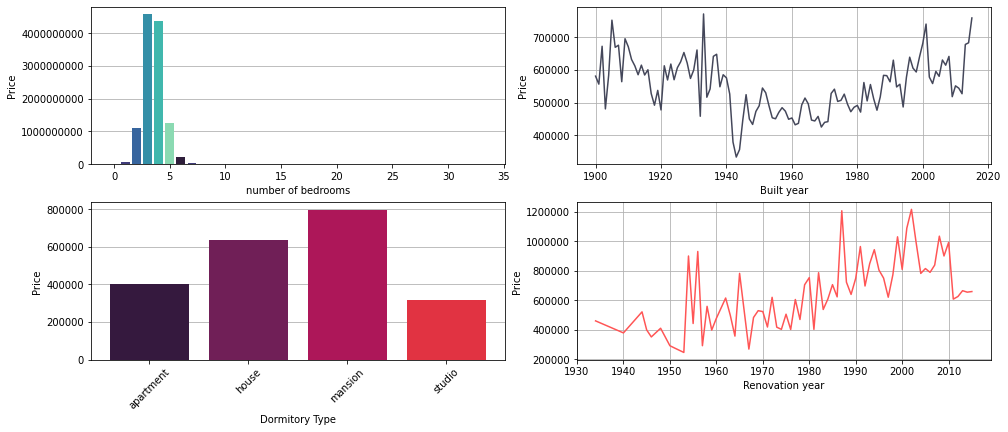

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 6))

plt.subplot(221)
plt.bar(sumprice['bedrooms'], sumprice['price'], color=sns.color_palette('mako'), zorder=2)
plt.grid(axis='y', zorder=0)
plt.ylabel('Price')
plt.xlabel('number of bedrooms')
plt.ticklabel_format(style='plain')

plt.subplot(222)
plt.plot(meanpby_year['yr_built'], meanpby_year['price'], color='#44475a')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Built year')

plt.subplot(223)
plt.bar(meanpby_type['dormitory_type'], meanpby_type['price'], color=sns.color_palette('rocket'), zorder=2)
plt.grid(axis='y', zorder=0)
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.xlabel('Dormitory Type')

plt.subplot(224)
plt.plot(meanpby_renovated['yr_renovated'], meanpby_renovated['price'], color="#ff5555")
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Renovation year')
plt.ticklabel_format(style='plain')

fig.tight_layout(pad=0.7)

plt.show()

# Análise dos gráficos abaixo!
# Observamos os preços dos imóveis com relação ao número de quartos!
# Observamos os preços dos imóveis com relação a classificação executada para (studio, apartment, house, mansion)!
# Observamos os preços dos imóveis com relação ao ano de construção!
# Observamos os preços dos imóveis com relação ao ano que os imóveis foram remodelados ou sofreram reformas!

In [ ]:
# Uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios¶

meanpby_built_type = df[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()

meanpby_built_type


,yr_built,dormitory_type,price
0,1900,apartment,589533.333
1,1900,house,636726.087
2,1900,mansion,715562.500
3,1900,studio,398944.000
4,1901,apartment,452856.400
...,...,...,...
415,2014,studio,516500.000
416,2015,apartment,543250.000
417,2015,house,940324.308
418,2015,mansion,820913.889


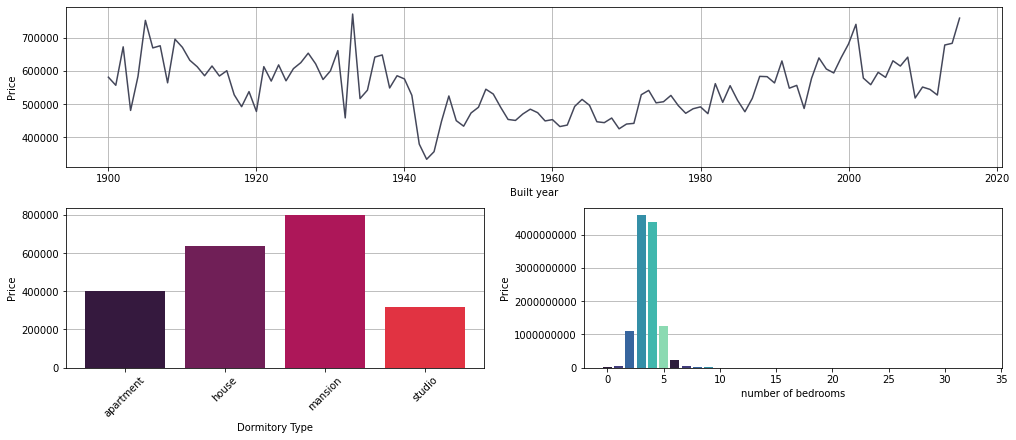

In [ ]:
# Criação de um Dashboard com 2 linhas e 2 colunas com os gráficos das questões anteriores:

from matplotlib import gridspec

fig = plt.figure('Dashboard 2x2', figsize=(14, 6), constrained_layout=True)

specs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 1])
ax3 = fig.add_subplot(specs[1, 0])

ax2.bar(sumprice['bedrooms'], sum_price['price'], color=sns.color_palette('mako'), zorder=2)
ax2.grid(axis='y', zorder=0)
ax2.set_ylabel('Price')
ax2.set_xlabel('number of bedrooms')
ax2.ticklabel_format(style='plain')

ax1.plot(meanpby_year['yr_built'], meanpby_year['price'], color='#44475a')
ax1.grid(True)
ax1.set_ylabel('Price')
ax1.set_xlabel('Built year')


ax3.bar(meanpby_type['dormitory_type'], meanpby_type['price'].round(0), color=sns.color_palette('rocket'), zorder=2)
ax3.grid(axis='y', zorder=0)
ax3.set_xticklabels(labels=meanpby_type['dormitory_type'], rotation=45)
ax3.set_ylabel('Price')
ax3.set_xlabel('Dormitory Type')

plt.show()

# Análise dos gráficos abaixo!
# Observamos os preços dos imóveis com relação ao ano de construção!
# Observamos os preços dos imóveis com relação a classificação executada para (studio, apartment, house, mansion)!
# Observamos os preços dos imóveis com relação ao número de quartos!

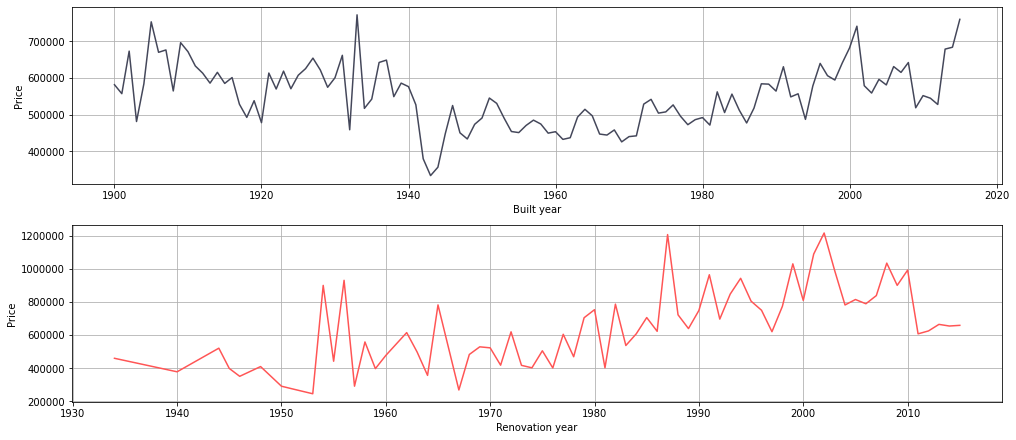

In [ ]:
# Criação de um Dashboard com 2 linhas e 2 colunas com os gráficos das questões anteriores:

fig = plt.figure('Dashboard 2x1', figsize=(14, 6), constrained_layout=True)
specs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])

ax1.plot(meanpby_year['yr_built'], meanpby_year['price'], color="#44475a")
ax1.grid(True)
ax1.set_ylabel('Price')
ax1.set_xlabel('Built year')

ax2.plot(meanpby_renovated['yr_renovated'], meanpby_renovated['price'], color="#ff5555")
ax2.grid(True)
ax2.set_ylabel('Price')
ax2.set_xlabel('Renovation year')
ax2.ticklabel_format(style='plain')

plt.show()

# Análise dos gráficos abaixo!
# Observamos os preços dos imóveis com relação ao ano de construção!
# Observamos os preços dos imóveis com relação ao ano que os imóveis foram remodelados ou sofreram reformas!

In [ ]:
# Mapa com o tamanho dos pontos sendo proporcionais ao tamanho da sala de estar¶


import plotly.express as px

df_map = df[['id', 'lat', 'long', 'price', 'condition', 'date', 'sqft_living']]

mapa = px.scatter_mapbox(df_map, lat='lat', lon='long', 
                         hover_name='id', 
                         hover_data=['price'],
                         color='condition', 
                         color_continuous_scale=px.colors.sequential.Viridis, 
                         zoom=9, 
                         size='sqft_living', 
                         size_max=15)
mapa.update_layout(mapbox_style='open-street-map', margin={'l': 0, 't': 0, 'r': 0, 'b': 0})

mapa.show()

mapa.write_html('/content/drive/MyDrive/map.html')